# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 5: *CurvatureByIntensity*
Obtain curvature by changes in intensities
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, createImageF, plotImageL, plotImageF 
from ImageOperatorsUtilities import applyCannyEdgeDetector
from ConvolutionUtilities import createSobelKernel, applyKernelF

# Math and iteration
from math import fabs
from timeit import itertools

### Parameters:
    imageName = Input image name
    GaussianKernelSize = Gaussian kernel size. Filter noise
    sobelKernelSize = Sobel kernel size. Edge detection
    upperT = Upper threshold
    lowerT = Lower threshold
    op = Method option   
            T for tangent direction
            TI for tangent inverse
            N for normal direction
            NI for normal inverse

In [2]:
imageName = "Shapes.png"
GaussianKernelSize = 7
sobelKernelSize = 3
upperT = 0.4
lowerT = 0.2
op = "T"

### Read and show image

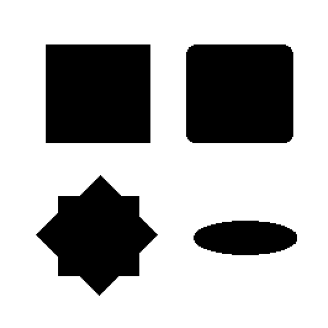

In [3]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter5/Input/")
inputImage, width, height = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Apply Canny to obtain the edges from the image

In [4]:
magnitude, angle, mX, mY = applyCannyEdgeDetector(inputImage, GaussianKernelSize, sobelKernelSize, upperT, lowerT, True)

### Obtain gradient of the gradient

In [5]:
# We apply 4 convolutions, but these can be computed in a single image pass  
sobelX, sobelY = createSobelKernel(GaussianKernelSize)
mXx = applyKernelF(mX, sobelX)
mXy = applyKernelF(mX, sobelY)
mYx = applyKernelF(mY, sobelX)
mYy = applyKernelF(mY, sobelY)

### Compute curvature

In [6]:
curvature = createImageF(width, height)
for x,y in itertools.product(range(0, width), range(0, height)):
    # If it is an edge
    if magnitude[y,x] > 0:
        Mx2,My2,MxMy = mX[y,x]*mX[y,x], mY[y,x]*mY[y,x], mX[y,x]*mY[y,x]
        
        if Mx2 + My2 !=0.0:
            p = 1.0/ pow((Mx2 + My2), 1.5)
            
            if op == "T":
                curvature[y,x] = p * (My2 * mXx[y,x] - MxMy * mYx[y,x] +  \
                                      Mx2 * mYy[y,x] - MxMy * mXy[y,x])
            if op == "TI":
                curvature[y,x] = p * (-My2 * mXx[y,x] + MxMy * mYx[y,x] - \
                                      Mx2 * mYy[y,x] + MxMy * mXy[y,x])   
            if op == "N":
                curvature[y,x] = p * (Mx2  * mYx[y,x] - MxMy * mYx[y,x] - \
                                      MxMy * mYy[y,x] + My2  * mXy[y,x])   
            if op == "NI":
                curvature[y,x] = p * (-Mx2 *  mYx[y,x] + MxMy * mXx[y,x] + \
                                      MxMy * mYy[y,x] - My2 *  mXy[y,x]) 
                
            curvature[y,x] = fabs(curvature[y,x])

### Show result

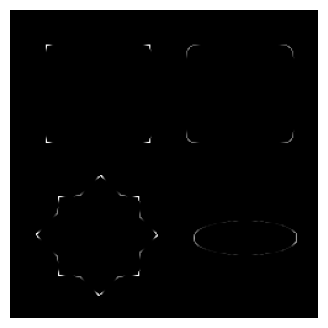

In [7]:
plotImageF(curvature, figureSize = 4)